# Assignment-3: CSCI 6517 Recommender System



## 0. Initializing and Importing Libraries

In [1]:
import sklearn
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import pickle

## Q1. Data Processing


In [2]:
%ls

data/  sample_data/


In [3]:
# read order_products__train.csv from Data folder
order_products_train = pd.read_csv('data/order_products__train.csv')

In [4]:
order_products_train.head(20)

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1
5,1,13176,6,0
6,1,47209,7,0
7,1,22035,8,1
8,36,39612,1,0
9,36,19660,2,1


### Q1.a Split data into holdout and cold start set

In [5]:
order_products_train.shape

(1384617, 4)

In [6]:
order_groups = order_products_train.groupby('order_id')

In [7]:
len(order_groups)

131209

In [8]:
# Extracting the unique group keys
group_keys = order_groups.groups.keys()


holdout_groups, coldstart_groups = train_test_split(list(group_keys),
                                                    test_size=0.3,
                                                    random_state=42)

# Creating holdout and cold start dataframes
holdout = pd.concat([group_data for group_key, group_data in order_groups if group_key in holdout_groups])
coldstart = pd.concat([group_data for group_key, group_data in order_groups if group_key in coldstart_groups])

In [9]:
print('Number of groups in holdout groups: ', len(holdout_groups))
print('Number of groups in cold start groups: ', len(coldstart_groups))

Number of groups in holdout groups:  91846
Number of groups in cold start groups:  39363


In [10]:
holdout.head(20)

,order_id,product_id,add_to_cart_order,reordered
8,36,39612,1,0
9,36,19660,2,1
10,36,49235,3,0
11,36,43086,4,1
12,36,46620,5,1
13,36,34497,6,1
14,36,48679,7,1
15,36,46979,8,1
16,38,11913,1,0
17,38,18159,2,0


### Q1.a.i

* Number of groups in holdout groups:  91846
* Number of groups in cold start groups:  39363

#### Q1.a.ii

On average, how many items are in each basket in the holdout and cold start groups respectively?

In [11]:
# find average number of products in each group
# Calculating the number of data points in each group in the holdout set
holdout_group_sizes = holdout.groupby(order_groups.grouper.names).size()

# Calculating the average number of data points in each group in the holdout set
average_holdout_group_size = holdout_group_sizes.mean()
average_holdout_group_size

/tmp/ipython-input-11-2635026207.py:3: FutureWarning: DataFrameGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  holdout_group_sizes = holdout.groupby(order_groups.grouper.names).size()


np.float64(10.555810813753457)

In [12]:
# Calculating the number of data points in each group in the coldstart set
coldstart_group_sizes = coldstart.groupby(order_groups.grouper.names).size()
print(order_groups.grouper.names)

# Calculating the average number of data points in each group in the coldstart set
average_coldstart_group_size = coldstart_group_sizes.mean()
average_coldstart_group_size

['order_id']


/tmp/ipython-input-12-2355605438.py:2: FutureWarning: DataFrameGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  coldstart_group_sizes = coldstart.groupby(order_groups.grouper.names).size()
/tmp/ipython-input-12-2355605438.py:3: FutureWarning: DataFrameGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  print(order_groups.grouper.names)


np.float64(10.545639305947208)

In [13]:
print(f"Average items in each basket (holdout): {average_holdout_group_size:.2f}")
print(f"Average items in each basket (cold-start): {average_coldstart_group_size:.2f}")

Average items in each basket (holdout): 10.56
Average items in each basket (cold-start): 10.55


#### Q1.a.iii

How many groups are there with more than 8 items?

In [14]:
# For the holdout set
holdout_orders_more_than_8 = (holdout_group_sizes > 8).sum()

# For the cold-start set
coldstart_orders_more_than_8 = (coldstart_group_sizes > 8).sum()

print(f"Holdout groups with more than 8 items: {holdout_orders_more_than_8}")
print(f"Cold-start groups with more than 8 items: {coldstart_orders_more_than_8}")

Holdout groups with more than 8 items: 46677
Cold-start groups with more than 8 items: 19941


Investigate minimum number of products in each group in the holdout set

In [15]:
minimum_holdout_group_size = holdout_group_sizes.min()
minimum_holdout_group_size

1

In [16]:
holdout.head(15)

,order_id,product_id,add_to_cart_order,reordered
8,36,39612,1,0
9,36,19660,2,1
10,36,49235,3,0
11,36,43086,4,1
12,36,46620,5,1
13,36,34497,6,1
14,36,48679,7,1
15,36,46979,8,1
16,38,11913,1,0
17,38,18159,2,0


In [17]:
#copy coldstart to cold_start and remove coldstart from memory
cold_start = coldstart.copy()
del coldstart

In [18]:
cold_start.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [19]:
holdout.shape

(969509, 4)

In [20]:
cold_start.shape

(415108, 4)

For your **HOLDOUT DATASET** obtained from previous step, for each order, put first 8 products (items) into training set and put the rest into the validation set. If the cart does not have more than 8 items, remove the order from your data pool.

In [21]:
order_counts = holdout.groupby('order_id').size().reset_index(name='count')
less_than_equal_8_count = order_counts[order_counts['count'] <= 8].shape[0]
print('Number of **ORDER_ID** with less than or equal to 8 products: ', less_than_equal_8_count)

Number of **ORDER_ID** with less than or equal to 8 products:  45169


Remove the order_id that has less than or equal to 8 products

In [22]:
filtered_holdout = holdout.groupby('order_id').filter(lambda x: len(x) > 8)
filtered_holdout.shape

(760277, 4)

For each order_id, put first 8 into training set and put the rest into the validation set

In [23]:
filtered_holdout = filtered_holdout.astype(int)
# Initialize empty dataframes for holdout_train and holdout_valid
holdout_train = pd.DataFrame(columns=filtered_holdout.columns)
holdout_valid = pd.DataFrame(columns=filtered_holdout.columns)

# Group the filtered holdout data by 'order_id'
grouped_holdout = filtered_holdout.groupby('order_id')

# Iterate over each group and split into holdout_train and holdout_valid
for order_id, group in grouped_holdout:
    holdout_train = pd.concat([holdout_train, group.head(8).sort_values(by='add_to_cart_order')])
    holdout_valid = pd.concat([holdout_valid, group.tail(len(group) - 8).sort_values(by='add_to_cart_order')])


for each order_id, put them in array for saving and training later.

In [24]:
train_data = holdout_train.groupby('order_id')['product_id'].apply(list).reset_index()
validation_data = holdout_valid.groupby('order_id')['product_id'].apply(list).reset_index()

In [25]:
train_data[:5]

,order_id,product_id
0,38,"[11913, 18159, 4461, 21616, 23622, 32433, 2884..."
1,112,"[27104, 21174, 41860, 38273, 47209, 5876, 2921..."
2,170,"[18394, 37766, 13176, 6236, 5077, 8153, 43772,..."
3,226,"[28199, 24852, 29883, 28427, 7754, 39947, 4730..."
4,349,"[33000, 11361, 27695, 47672, 45633, 38015, 369..."


In [26]:
validation_data[-5:]

,order_id,product_id
46672,3420851,"[14870, 4605, 24964, 27845, 35091, 43545, 21506]"
46673,3420894,"[10749, 47630, 34320, 13176, 20995, 9515, 2948..."
46674,3420895,"[38900, 35042, 48183, 5803, 15390, 1408, 45007..."
46675,3420909,"[21137, 19660]"
46676,3420996,"[27423, 12125, 1891]"


In [27]:
train_data = np.array(train_data['product_id'].to_list(), dtype=object)
validation_data = np.array(validation_data['product_id'].to_list(), dtype=object)

In [28]:
train_data[:5]

array([[11913, 18159, 4461, 21616, 23622, 32433, 28842, 42625],
       [27104, 21174, 41860, 38273, 47209, 5876, 29217, 9047],
       [18394, 37766, 13176, 6236, 5077, 8153, 43772, 25591],
       [28199, 24852, 29883, 28427, 7754, 39947, 47307, 36291],
       [33000, 11361, 27695, 47672, 45633, 38015, 36968, 30830]],
      dtype=object)

#### Q1.b.i

In [29]:
# The number of orders in the filtered holdout set is the length of the new train_data list
num_filtered_holdout_orders = len(train_data)

# The number of orders in the cold-start set is unchanged
num_coldstart_orders = len(coldstart_groups)

print(f"Orders in filtered holdout dataset: {num_filtered_holdout_orders}")
print(f"Orders in cold-start dataset: {num_coldstart_orders}")

Orders in filtered holdout dataset: 46677
Orders in cold-start dataset: 39363


#### Q1.b.ii

In [30]:
# A repeated purchase would mean a product_id appears multiple times for the same order_id.
# We can check by grouping by order_id and product_id and seeing if any group has a size > 1.
repeated_purchases = order_products_train.groupby(['order_id', 'product_id']).size()
num_repeated = (repeated_purchases > 1).sum()

if num_repeated == 0:
    print("No, there are no repeated purchases within any single order.")
else:
    print(f"Yes, there are {num_repeated} instances of repeated purchases.")

No, there are no repeated purchases within any single order.


#### Q1.b.iii

In [31]:
for i in range(5):
    print(train_data[i])

[11913 18159 4461 21616 23622 32433 28842 42625]
[27104 21174 41860 38273 47209 5876 29217 9047]
[18394 37766 13176 6236 5077 8153 43772 25591]
[28199 24852 29883 28427 7754 39947 47307 36291]
[33000 11361 27695 47672 45633 38015 36968 30830]


Save data to file in Data folder for future use

In [32]:
# save train_data and validation_data to file in Data folder as pickle
with open('data/train_data.pkl', 'wb') as f:
    pickle.dump(train_data, f)

with open('data/validation_data.pkl', 'wb') as f:
    pickle.dump(validation_data, f)

load train_data and validation_data from file in Data folder as pickle

For Google Collab

In [33]:
# from google.colab import drive
# drive.mount('/content/drive')

In [34]:
# %cd '/content/drive/MyDrive/RecSys/A3'

Load processed data from file.

In [35]:
# load train_data and validation_data from file in Data folder as pickle
import pickle

with open('data/train_data.pkl', 'rb') as f:
    train_data = pickle.load(f)

with open('data/validation_data.pkl', 'rb') as f:
    validation_data = pickle.load(f)

## Q2. Train GPT as a sequential recommender system

### Q2.a.i

If a GPT model is trained on input sequences with the length of 8, depending on the impelemtation, it may be able to take input of length 9 without crashing, but it will only be able to make predictions on the 8 of the tokens.

For example, in the implementation of the `generate()` function in `BigramLanguageModel` class, we use the line of code
```
idx_cond = idx[:, -block_size:]
```
to truncate the input tokens to the block_size. thereby preventing IndexError from crashing the model if a token length greater than blok_size is passed. However, while the model can take tokens with greater length without crashing, only tokens of length block_size are used in making predictions.

In the case of the model implementation, the last block_size tokens will be used used for making the predictions, while the earlier token will be discarded. This is because the Positional embeddings are fixed to block_size and the Attention mask is precomputed for block_size.


### Q2.a.ii

### Why do we need position encoding when using the GPT model?
Because self-attention, which is the core of a GPT model, has no built-in sense of order; it processes all input tokens in pararell. So for a transformer model like GPT without permutation:
```
model([milk, eggs, bread]) == model([bread, eggs, milk])
```
Therefore, whenever the positions of the items matter for our use-case, we need to implement positional encoding if we want to use a GPT model.

### Do you need to have position encoding for within-basket recommendation task? Why?
Since the within-basket recommendation is a "sequential" recommender system (given n items in the cart, suggest NEXT item), then YES, we do need to have positional encoding.

This is because the order in which items are added to the cart helps us to identify the shopper's intent.

### 2.b

#### Initialize the hyperparameters

In [36]:
import torch
import torch.nn as nn
from torch.nn import functional as F

# hyperparameters
batch_size = 4 # how many independent sequences will we process in parallel?
block_size = 4 # what is the maximum context length for predictions?
max_iters = 2000
eval_interval = 100
learning_rate = 1e-3
device = 'cuda' if torch.cuda.is_available() else 'cpu'
eval_iters = 200
n_embd = 32
n_head = 4
n_layer = 4
dropout = 0.2

In [37]:
import os
os.environ['CUDA_LAUNCH_BLOCKING'] = '1'

#### Dataset alignment for Model

In [38]:
train_data[0:5]

array([[11913, 18159, 4461, 21616, 23622, 32433, 28842, 42625],
       [27104, 21174, 41860, 38273, 47209, 5876, 29217, 9047],
       [18394, 37766, 13176, 6236, 5077, 8153, 43772, 25591],
       [28199, 24852, 29883, 28427, 7754, 39947, 47307, 36291],
       [33000, 11361, 27695, 47672, 45633, 38015, 36968, 30830]],
      dtype=object)

In [39]:
# check number of unique product_id's in 'product_id' column of filtered_holdout dataset
vocab_size = np.unique(train_data)
vocab_size = len(vocab_size)
vocab_size

25993

In [40]:
# now, provide a encoder and decoder. encoder will take in a 2d array and will return a 2d array. each number will be encoded to a unique number corresponding to that number. decoder will take an encoded 2d array and return back the original 2d array.

num_mapping = {}
rev_mapping = {}

def encode(arr):
    id_for_unique_number = 1
    encoded_arr = []

    for row in arr:
        encoded_row = []
        for num in row:
            if num not in num_mapping:
                num_mapping[num] = id_for_unique_number
                rev_mapping[id_for_unique_number] = num
                id_for_unique_number += 1
            encoded_row.append(num_mapping[num])
        encoded_arr.append(encoded_row)

    return encoded_arr


def decode(encoded_arr):
    decoded_arr = []

    for row in encoded_arr:
        decoded_row = []
        for num in row:
            if num == 0:
                decoded_row.append(0)
            else:
                decoded_row.append(rev_mapping[num])
        decoded_arr.append(decoded_row)

    return decoded_arr


In [41]:
len(train_data), len(validation_data)

(46677, 46677)

In [42]:
# now encode train_data and validation_data
encoded_train_data = encode(train_data)
encoded_validation_data = encode(validation_data)

In [43]:
# make sure validation data is same length as train data where block_size is 4.
# now validation data is of variable length. so, we need to pad it to make it same length as train data.
# we will pad it with 0's
def masked_validation_data(val_data, block_size):
    # Truncate or pad the validation sequences to match the block_size of training data
    aligned_val_data = []

    for seq in val_data:
        seq_length = len(seq)

        if seq_length > block_size:
            aligned_val_data.append(seq[:block_size])  # Truncate the sequence
        else:
            padded_seq = seq + [0] * (block_size - seq_length)  # Pad with 0 token
            aligned_val_data.append(padded_seq)

    return aligned_val_data




In [44]:
# convert the train_data and validation_data to tensors
train_data_tensor = torch.tensor(encoded_train_data)
validation_data_tensor = torch.tensor(masked_validation_data(encoded_validation_data, 8))

In [45]:
# check the shape of train_data_tensor and validation_data_tensor
train_data_tensor.shape, validation_data_tensor.shape

(torch.Size([46677, 8]), torch.Size([46677, 8]))

In [46]:
train_data_tensor[:2]

tensor([[ 1,  2,  3,  4,  5,  6,  7,  8],
        [ 9, 10, 11, 12, 13, 14, 15, 16]])

#### Batch Production

In [47]:
import random

def get_batch(split):
  data = train_data_tensor if split == 'train' else validation_data_tensor
  shape = data.shape

  ix = random.sample(range(shape[0]), batch_size)  # Generate 4 random integers
  jx = random.sample(range(shape[1] - block_size), batch_size)

  x = torch.empty(0, block_size, dtype=torch.long)
  y = torch.empty(0, block_size, dtype=torch.long)

  for i in range(batch_size):
    x_temp = data[ix[i]:ix[i]+1, jx[i]:jx[i]+block_size]
    y_temp = data[ix[i]:ix[i]+1, jx[i]+1: jx[i]+1+block_size]

    x = torch.cat((x, x_temp), dim=0)
    y = torch.cat((y, y_temp), dim=0)

  x, y = x.to(device), y.to(device)

  return x, y


In [48]:
get_batch("train")

(tensor([[ 5468, 17623,  1404,   204],
         [ 1961,    35,   965,  2894],
         [   21,     9,   269,   669],
         [  616,    14,  1708,     7]]),
 tensor([[17623,  1404,   204,   818],
         [   35,   965,  2894,   668],
         [    9,   269,   669,   895],
         [   14,  1708,     7,  4066]]))

In [49]:
class Head(nn.Module):
    """ one head of self-attention """

    def __init__(self, head_size):
        super().__init__()
        self.key = nn.Linear(n_embd, head_size, bias=False)
        self.query = nn.Linear(n_embd, head_size, bias=False)
        self.value = nn.Linear(n_embd, head_size, bias=False)
        self.register_buffer('tril', torch.tril(torch.ones(block_size, block_size)))

        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        B,T,C = x.shape
        k = self.key(x)   # (B,T,C)
        q = self.query(x) # (B,T,C)
        # compute attention scores ("affinities")
        wei = q @ k.transpose(-2,-1) * C**-0.5 # (B, T, C) @ (B, C, T) -> (B, T, T)
        wei = wei.masked_fill(self.tril[:T, :T] == 0, float('-inf')) # (B, T, T)
        wei = F.softmax(wei, dim=-1) # (B, T, T)
        wei = self.dropout(wei)
        # perform the weighted aggregation of the values
        v = self.value(x) # (B,T,C)
        out = wei @ v # (B, T, T) @ (B, T, C) -> (B, T, C)
        return out

class MultiHeadAttention(nn.Module):
    """ multiple heads of self-attention in parallel """

    def __init__(self, num_heads, head_size):
        super().__init__()
        self.heads = nn.ModuleList([Head(head_size) for _ in range(num_heads)])
        self.proj = nn.Linear(n_embd, n_embd)
        self.dropout = nn.Dropout(dropout)

    def forward(self, x):
        out = torch.cat([h(x) for h in self.heads], dim=-1)
        out = self.dropout(self.proj(out))
        return out

class FeedFoward(nn.Module):
    """ a simple linear layer followed by a non-linearity """

    def __init__(self, n_embd):
        super().__init__()
        self.net = nn.Sequential(
            nn.Linear(n_embd, 4 * n_embd),
            nn.ReLU(),
            nn.Linear(4 * n_embd, n_embd),
            nn.Dropout(dropout),
        )

    def forward(self, x):
        return self.net(x)

class Block(nn.Module):
    """ Transformer block: communication followed by computation """

    def __init__(self, n_embd, n_head):
        # n_embd: embedding dimension, n_head: the number of heads we'd like
        super().__init__()
        head_size = n_embd // n_head
        self.sa = MultiHeadAttention(n_head, head_size)
        self.ffwd = FeedFoward(n_embd)
        self.ln1 = nn.LayerNorm(n_embd)
        self.ln2 = nn.LayerNorm(n_embd)

    def forward(self, x):
        x = x + self.sa(self.ln1(x))
        x = x + self.ffwd(self.ln2(x))
        return x

# super simple bigram model
class BigramLanguageModel(nn.Module):
    def __init__(self, vocab_size):
        super().__init__()
        self.token_embedding_table = nn.Embedding(vocab_size + 1, n_embd, padding_idx=0)
        self.position_embedding_table = nn.Embedding(block_size, n_embd)
        self.blocks = nn.Sequential(*[Block(n_embd, n_head=n_head) for _ in range(n_layer)])
        self.ln_f = nn.LayerNorm(n_embd)
        self.lm_head = nn.Linear(n_embd, vocab_size + 1)

    def forward(self, idx, targets=None):
        B, T = idx.shape
        tok_emb = self.token_embedding_table(idx.long())  # Convert idx to torch.long
        pos_emb = self.position_embedding_table(torch.arange(T, device=device))
        x = tok_emb + pos_emb
        x = self.blocks(x)
        x = self.ln_f(x)
        logits = self.lm_head(x)

        if targets is None:
            loss = None
        else:
            B, T, C = logits.shape
            logits = logits.view(B * T, C)
            targets = targets.view(B * T)
            loss = F.cross_entropy(logits, targets, ignore_index=0) # Ignore padding

        return logits, loss

    def generate(self, idx, max_new_tokens):
        for _ in range(max_new_tokens):
            idx_cond = idx[:, -block_size:]
            logits, loss = self(idx_cond)
            logits = logits[:, -1, :]
            probs = F.softmax(logits, dim=-1)
            idx_next = torch.multinomial(probs, num_samples=1)
            idx = torch.cat((idx, idx_next), dim=1)
        return idx

    def generate(self, idx, max_new_tokens):
        # idx is (B, T) array of indices in the current context
        for _ in range(max_new_tokens):
            # crop idx to the last block_size tokens
            idx_cond = idx[:, -block_size:]
            # get the predictions
            logits, loss = self(idx_cond)
            # focus only on the last time step
            logits = logits[:, -1, :] # becomes (B, C)
            # apply softmax to get probabilities
            probs = F.softmax(logits, dim=-1) # (B, C)
            # sample from the distribution
            idx_next = torch.multinomial(probs, num_samples=1) # (B, 1)
            # append sampled index to the running sequence
            idx = torch.cat((idx, idx_next), dim=1) # (B, T+1)
        return idx

In [50]:
@torch.no_grad()
def estimate_loss():
    out = {}
    model.eval()
    for split in ['train', 'val']:
        losses = torch.zeros(eval_iters)
        for k in range(eval_iters):
            X, Y = get_batch(split)
            logits, loss = model(X, Y)
            losses[k] = loss.item()
        out[split] = losses.mean()
    model.train()
    return out

#### Training

In [51]:
model = BigramLanguageModel(vocab_size)
m = model.to(device)
# print the number of parameters in the model
print(sum(p.numel() for p in m.parameters())/1e6, 'M parameters')

train_losses = []
iteration_points = []
print_interval = 200
# create a PyTorch optimizer
optimizer = torch.optim.AdamW(model.parameters(), lr=learning_rate)

for iter in range(max_iters):

    # # every once in a while evaluate the loss on train and val sets
    if iter % eval_interval == 0 or iter == max_iters - 1:
        losses = estimate_loss()
        print(f"step {iter}: train loss {losses['train']:.4f}, val loss {losses['val']:.4f}")
        train_losses.append(losses['train'])
        iteration_points.append(iter)

    # sample a batch of data
    xb, yb = get_batch('train')

    # evaluate the loss
    logits, loss = model(xb, yb)
    optimizer.zero_grad(set_to_none=True)
    loss.backward()
    optimizer.step()


1.740234 M parameters
step 0: train loss 10.3264, val loss 10.3448
step 100: train loss 9.5206, val loss 9.6252
step 200: train loss 9.0669, val loss nan
step 300: train loss 9.0487, val loss 9.3916
step 400: train loss 9.0091, val loss nan
step 500: train loss 8.9636, val loss 9.1634
step 600: train loss 8.8607, val loss nan
step 700: train loss 8.8699, val loss 9.2263
step 800: train loss 8.8721, val loss 9.1746
step 900: train loss 8.7769, val loss nan
step 1000: train loss 8.8007, val loss nan
step 1100: train loss 8.7745, val loss 9.0590
step 1200: train loss 8.8028, val loss 9.1542
step 1300: train loss 8.8197, val loss 9.2011
step 1400: train loss 8.6347, val loss 9.0092
step 1500: train loss 8.8398, val loss 9.1565
step 1600: train loss 8.7630, val loss 8.9998
step 1700: train loss 8.6840, val loss 9.0997
step 1800: train loss 8.7829, val loss nan
step 1900: train loss 8.6275, val loss 9.0246
step 1999: train loss 8.7157, val loss 9.0124


#### Save the model

In [52]:
path = 'base_model.pt'

In [53]:
# Save the model
torch.save(m.state_dict(), path)

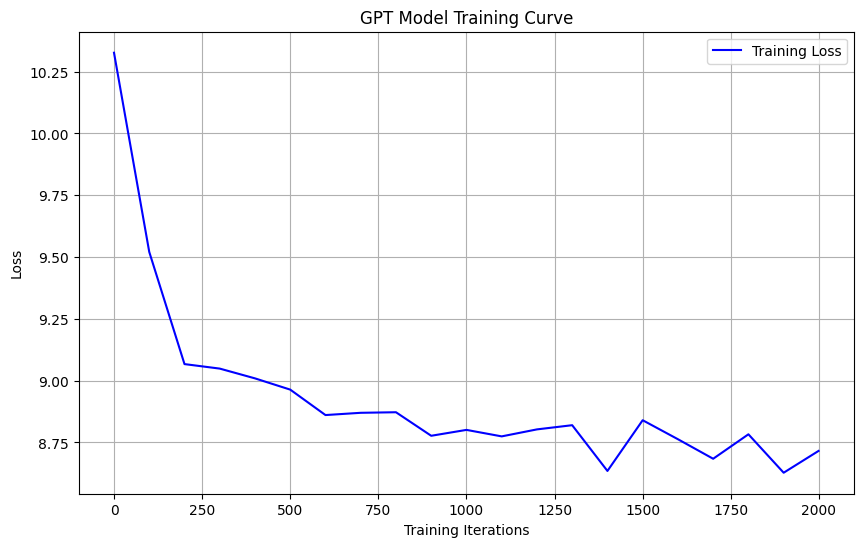

In [54]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.plot(iteration_points, train_losses, 'b-', label='Training Loss')
plt.xlabel('Training Iterations')
plt.ylabel('Loss')
plt.title('GPT Model Training Curve')
plt.legend()
plt.grid(True)
plt.savefig('training_curve.png')  # Saves to current directory
plt.show()

#### Load the Model

In [55]:
# Load the model
model = BigramLanguageModel(vocab_size)
model.load_state_dict(torch.load(path))
m = model.to(device)
m.eval()

BigramLanguageModel(
  (token_embedding_table): Embedding(25994, 32, padding_idx=0)
  (position_embedding_table): Embedding(4, 32)
  (blocks): Sequential(
    (0): Block(
      (sa): MultiHeadAttention(
        (heads): ModuleList(
          (0-3): 4 x Head(
            (key): Linear(in_features=32, out_features=8, bias=False)
            (query): Linear(in_features=32, out_features=8, bias=False)
            (value): Linear(in_features=32, out_features=8, bias=False)
            (dropout): Dropout(p=0.2, inplace=False)
          )
        )
        (proj): Linear(in_features=32, out_features=32, bias=True)
        (dropout): Dropout(p=0.2, inplace=False)
      )
      (ffwd): FeedFoward(
        (net): Sequential(
          (0): Linear(in_features=32, out_features=128, bias=True)
          (1): ReLU()
          (2): Linear(in_features=128, out_features=32, bias=True)
          (3): Dropout(p=0.2, inplace=False)
        )
      )
      (ln1): LayerNorm((32,), eps=1e-05, elementwise_aff

##### Evaluation

Evaluation Metrics for Sequential RecSys

In [56]:
import numpy as np

def precision_at_k(true_list, predicted_list, k):
    true_positive = len(set(true_list[:k]) & set(predicted_list[:k]))
    if k == 0:
        return 0
    return true_positive / k

def recall_at_k(true_list, predicted_list, k):
    true_positive = len(set(true_list[:k]) & set(predicted_list[:k]))
    actual_positive = len(set(true_list))
    if actual_positive == 0:
        return 0
    return true_positive / actual_positive

def ndcg_at_k(true_list, predicted_list, k):
    relevance = [1 if item in true_list else 0 for item in predicted_list[:k]]
    if np.sum(relevance) == 0:
        return 0

    dcg = relevance[0]
    for i in range(1, len(relevance)):
        dcg += relevance[i] / np.log2(i + 1)

    ideal_relevance = sorted(relevance, reverse=True)

    idcg = ideal_relevance[0]
    for i in range(1, len(ideal_relevance)):
        idcg += ideal_relevance[i] / np.log2(i + 1)

    return dcg / idcg

def evaluate_performance(true_lists, predicted_lists):
    assert len(true_lists) == len(predicted_lists), "Number of lists must be the same"

    precision = []
    recall = []
    ndcg = []
    # k_values = [1, 3, 5]
    k_values = [10]

    for true_list, predicted_list in zip(true_lists, predicted_lists):
        for k in k_values:
            precision_k = precision_at_k(true_list, predicted_list, k)
            recall_k = recall_at_k(true_list, predicted_list, k)
            ndcg_k = ndcg_at_k(true_list, predicted_list, k)

            precision.append(precision_k)
            recall.append(recall_k)
            ndcg.append(ndcg_k)

    avg_precision = np.mean(precision)
    avg_recall = np.mean(recall)
    avg_ndcg = np.mean(ndcg)

    return avg_precision, avg_recall, avg_ndcg


In [57]:
def print_Performance_2(true_val, pred_val):
  precision, recall, ndcg = evaluate_performance(true_val, pred_val)

  print("Precision@k:", precision)
  print("Recall@k:", recall)
  print("nDCG@k:", ndcg)

### Q3.a.i

In [103]:
from tqdm import tqdm

def holdout_predictions_data():
  list_true = []
  list_predict = []
  prediction_count = 0
  MAX_PREDICTIONS = 4

  for i in tqdm(range(len(train_data_tensor) - 1, -1, -1), total=MAX_PREDICTIONS):
      train_row = train_data_tensor[i]
      validation_row = validation_data_tensor[i].tolist()
      validation_row = [i for i in validation_row if i != 0]

      if len(validation_row) < 5:
          continue

      ### update your code here
      cart_seq = train_row[4:8]
      ### update your code here

      #now predict from the model
      context = cart_seq.unsqueeze(0).to(device)
      predict = m.generate(context, max_new_tokens=len(validation_row))[0].tolist()

      # copy only the prediction from the sequence
      predict = predict[-len(validation_row):]

      #keep tab of true and predicted value for performance evaluation
      list_true.append(validation_row)
      list_predict.append(predict)

      prediction_count += 1

      print('==>', len(train_data_tensor), len(validation_row), prediction_count == MAX_PREDICTIONS)
      if prediction_count == MAX_PREDICTIONS:
          break

  return list_true, list_predict


In [109]:
list_true, list_predict = holdout_predictions_data()

print('Performance on Holdout Dataset: ')
print_Performance_2(list_true, list_predict)

5it [00:00, 25.26it/s]                       

==> 46677 8 False
==> 46677 8 False
==> 46677 7 False
==> 46677 6 True
Performance on Holdout Dataset: 
Precision@k: 0.0
Recall@k: 0.0
nDCG@k: 0.0


### Q3.b.ii Performance with **cold_start** dataset

In [60]:
def coldstart_predictions_data():
    list_true = []
    list_predict = []

    # Group cold-start orders
    cold_groups = cold_start.groupby('order_id')

    for order_id, group in tqdm(cold_groups):
        products = group['product_id'].tolist()

        # Skip orders with less than 5 items
        if len(products) < 5:
            continue

        # Encode product IDs using existing mapping
        encoded_products = [num_mapping[p] for p in products if p in num_mapping]

        # Use first 4 products as input
        input_seq = encoded_products[:4]

        # Ground truth = remaining items
        true_next = encoded_products[4:]

        # Generate predictions
        context = torch.tensor(input_seq, device=device).unsqueeze(0)
        predictions = m.generate(context, max_new_tokens=10)[0].tolist()
        predictions = predictions[-10:]  # Keep last 10 tokens

        list_true.append(true_next)
        list_predict.append(predictions)

    return list_true, list_predict

In [61]:
list_true, list_predict = coldstart_predictions_data()

print('Performance on coldstart Dataset: ')
print_Performance_2(list_true, list_predict)

100%|██████████| 39363/39363 [39:16<00:00, 16.71it/s]


Performance on coldstart Dataset: 
Precision@k: 0.005493303275427663
Recall@k: 0.007233588224858882
nDCG@k: 0.03508923108015408


### Q3.C.i

### Q3.C.ii

